In [23]:
from typing_extensions import Literal
from langchain_core.tools import tool
from langchain_groq import ChatGroq
from langgraph.graph import MessagesState, StateGraph,START,END
from langgraph.types import Command
from dotenv import load_dotenv
from IPython.display import Image, display
from langchain_openai import ChatOpenAI
from langchain_core.messages import BaseMessage, HumanMessage
from langgraph.prebuilt import create_react_agent
from typing import Annotated
from langchain_experimental.utilities import PythonREPL
from langchain_community.tools import DuckDuckGoSearchRun
import os
from langchain_community.tools.tavily_search import TavilySearchResults

In [24]:
load_dotenv()
# openai_model=ChatOpenAI(model="gpt-4o-mini")

from langchain_openai import AzureChatOpenAI
openai_model = AzureChatOpenAI(
    api_key=os.getenv("AZURE_OPENAI_API_KEY"),
    api_version="2024-08-01-preview",
    model="gpt-4o-mini",
    azure_endpoint=os.getenv("AZURE_OPENAI_API_BASE_CHAT")
)

In [25]:
openai_model.invoke("hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_7a53abb7a2', 'id': 'chatcmpl-BdxZxXjsfQ6kLb5Tevx9FdmaK9oZ0', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'filtered': False, 'detected': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'protected_material

In [26]:
# search_tool=DuckDuckGoSearchRun()
search_tool=TavilySearchResults()

In [27]:
search_tool.invoke("what is a gdp of india in PPP?")

[{'title': 'India GDP per capita PPP - Trading Economics',
  'url': 'https://tradingeconomics.com/india/gdp-per-capita-ppp',
  'content': "### GDP per Capita PPP in India is expected to reach 9737.00 USD by the end of 2025, according to Trading Economics global macro models and analysts expectations. In the long-term, the India GDP per capita PPP is projected to trend around 10380.00 USD in 2026 and 10992.00 USD in 2027, according to our econometric models. [...] ##### **Members**\n\n##### \n\n# India GDP per capita PPP\n\n## The Gross Domestic Product per capita in India was last recorded at 9160.06 US dollars in 2023, when adjusted by purchasing power parity (PPP). The GDP per Capita, in India, when adjusted by Purchasing Power Parity is equivalent to 52 percent of the world's average. source: [World Bank](https://www.worldbank.org/) [...] ## GDP per Capita PPP in India averaged 4721.97 USD from 1990 until 2023, reaching an all time high of 9160.06 USD in 2023 and a record low of 217

In [28]:
repl=PythonREPL()

In [29]:
code = """
x = 5
y = x * 2
print(y)
"""

In [30]:
repl.run(code)

'10\n'

In [31]:
@tool
def python_repl_tool(
    code: Annotated[str, "The python code to execute to generate your chart."],
):
    """Use this to execute python code. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
    
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
    return (
        result_str + "\n\nIf you have completed all tasks, respond with FINAL ANSWER."
    )

<>:13: SyntaxWarning: invalid escape sequence '\`'
<>:13: SyntaxWarning: invalid escape sequence '\`'
<>:13: SyntaxWarning: invalid escape sequence '\`'
<>:13: SyntaxWarning: invalid escape sequence '\`'
C:\Users\divak\AppData\Local\Programs\Python\Python311\ipykernel_13144\290981387.py:13: SyntaxWarning: invalid escape sequence '\`'
  result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
C:\Users\divak\AppData\Local\Programs\Python\Python311\ipykernel_13144\290981387.py:13: SyntaxWarning: invalid escape sequence '\`'
  result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"


In [32]:
def make_system_prompt(instruction:str)->str:
    return  (
        "You are a helpful AI assistant, collaborating with other assistants."
        " Use the provided tools to progress towards answering the question."
        " If you are unable to fully answer, that's OK, another assistant with different tools "
        " will help where you left off. Execute what you can to make progress."
        " If you or any of the other assistants have the final answer or deliverable,"
        " prefix your response with FINAL ANSWER so the team knows to stop."
        f"\n{instruction}"
    )

In [33]:
make_system_prompt(
        "You can only do research. You are working with a chart generator colleague."
    )

"You are a helpful AI assistant, collaborating with other assistants. Use the provided tools to progress towards answering the question. If you are unable to fully answer, that's OK, another assistant with different tools  will help where you left off. Execute what you can to make progress. If you or any of the other assistants have the final answer or deliverable, prefix your response with FINAL ANSWER so the team knows to stop.\nYou can only do research. You are working with a chart generator colleague."

In [34]:
"You are a helpful AI assistant, collaborating with other assistants. Use the provided tools to progress towards answering the question. If you are unable to fully answer, that's OK, another assistant with different tools  will help where you left off. Execute what you can to make progress. If you or any of the other assistants have the final answer or deliverable, prefix your response with FINAL ANSWER so the team knows to stop.\nYou can only do research. You are working with a chart generator colleague."

"You are a helpful AI assistant, collaborating with other assistants. Use the provided tools to progress towards answering the question. If you are unable to fully answer, that's OK, another assistant with different tools  will help where you left off. Execute what you can to make progress. If you or any of the other assistants have the final answer or deliverable, prefix your response with FINAL ANSWER so the team knows to stop.\nYou can only do research. You are working with a chart generator colleague."

In [35]:
def get_next_node(last_message:BaseMessage, goto:str):
    if "FINAL ANSWER" in last_message.content:
        # Any agent decided the work is done
        return END
    return goto

In [36]:
research_agent = create_react_agent(
    openai_model,
    tools=[search_tool],
    prompt=make_system_prompt(
        "You can only do research. You are working with a chart generator colleague."
    ),
)

In [37]:
chart_agent = create_react_agent(
    openai_model,
    [python_repl_tool],
    prompt=make_system_prompt(
        "You can only generate charts. You are working with a researcher colleague."
    ),
)

In [38]:
state={"message":["hi","hello"]}

In [39]:
state["message"][-1]

'hello'

In [40]:
def research_node(state:MessagesState)->Command[Literal["chart_generator", END]]:
    
    result = research_agent.invoke(state)
    
    goto = get_next_node(result["messages"][-1], "chart_generator")
    
    result["messages"][-1] = HumanMessage(content=result["messages"][-1].content, name="researcher")
    
    return Command(update={"messages": result["messages"]},goto=goto)

In [41]:
def chart_node(state:MessagesState)-> Command[Literal["researcher", END]]:
    
    result = chart_agent.invoke(state)
    
    goto = get_next_node(result["messages"][-1], "researcher")
    
    result["messages"][-1] = HumanMessage(content=result["messages"][-1].content, name="chart_generator")
    
    return Command(update={"messages": result["messages"]},goto=goto)

In [42]:
from langgraph.graph import StateGraph, START

workflow = StateGraph(MessagesState)
workflow.add_node("researcher", research_node)
workflow.add_node("chart_generator", chart_node)

workflow.add_edge(START, "researcher")
app = workflow.compile()

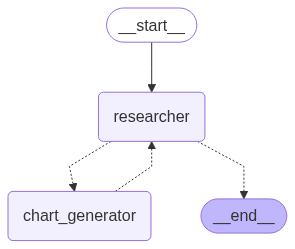

In [43]:
display(Image(app.get_graph().draw_mermaid_png()))

In [44]:
app.invoke({"messages": [("user","get the India's GDP over the past 25 years, then make a line chart of it.Once you make the chart, finish.")],})

{'messages': [HumanMessage(content="get the India's GDP over the past 25 years, then make a line chart of it.Once you make the chart, finish.", additional_kwargs={}, response_metadata={}, id='acd2e756-d621-4ed1-b54a-d435d4bc5d1f'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_W4Fqzu7CE1Hsu1fOZhtBxkIO', 'function': {'arguments': '{"query":"India GDP over the past 25 years"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 205, 'total_tokens': 231, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_7a53abb7a2', 'id': 'chatcmpl-Bdxa1sKc8MAJEQY7UHrXnxLYmMPrn', 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': 